<a href="https://colab.research.google.com/github/NgoThanhNha/Artificial_Intelligence/blob/main/W9_ANN_Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar100
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


In [4]:
# Chuyển đổi các nhãn ở đầu ra thành định dạng one-hot encoding
train_labels = to_categorical(train_labels, num_classes=100)
test_labels = to_categorical(test_labels, num_classes=100)

In [5]:
# Chuẩn hóa dữ liệu
train_images = train_images.reshape(50000,32*32*3)
train_images = train_images.astype('float32')/255

test_images = test_images.reshape(10000,32*32*3)
test_images = test_images.astype('float32')/255

In [6]:
#-----------------------------Tạo 2 lớp trong mô hình ANN---------------------------------
model = Sequential()
model.add(Dense(512,activation = 'relu',input_shape = (3072,))) # Lớp đầu tiên

In [7]:
# Lớp thứ 2
model.add(Dense(100,activation = 'Softmax')) # Lớp thứ 2, Liên kết với lớp trước đó, sẽ có 100 output ở ngõ ra

In [8]:
# Biên dịch chương trình
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy']) # Có thể sử dụng optimizer rmsprop hoặc Adam đều được. Nhưng đối với dữ liệu nhiều chiều thì Adam sẽ cho kết quả tốt hơn

In [30]:
# Bắt đầu huấn luyện
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Mất mát:',test_loss)
print('Độ chính xác',test_acc)

Epoch 1/10
391/391 [==============================] - 8s 20ms/step - loss: 3.0564 - accuracy: 0.2576
Epoch 2/10
391/391 [==============================] - 9s 22ms/step - loss: 3.0453 - accuracy: 0.2601
Epoch 3/10
391/391 [==============================] - 9s 23ms/step - loss: 3.0329 - accuracy: 0.2616
Epoch 4/10
391/391 [==============================] - 8s 21ms/step - loss: 3.0188 - accuracy: 0.2648
Epoch 5/10
391/391 [==============================] - 8s 22ms/step - loss: 3.0050 - accuracy: 0.2693
Epoch 6/10
391/391 [==============================] - 9s 22ms/step - loss: 2.9986 - accuracy: 0.2707
Epoch 7/10
391/391 [==============================] - 8s 22ms/step - loss: 2.9781 - accuracy: 0.2735
Epoch 8/10
391/391 [==============================] - 9s 24ms/step - loss: 2.9721 - accuracy: 0.2726
Epoch 9/10
391/391 [==============================] - 9s 22ms/step - loss: 2.9622 - accuracy: 0.2769
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 3.3896 - accurac

1/1 [==============================] - 0s 18ms/step


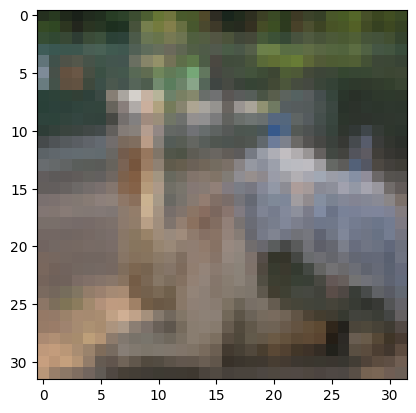

Label:  wolf


In [38]:
# Test mô hình
X = test_images
y = test_labels

i = 6 #Test hình thứ i
img = X[i].reshape(1, 32*32*3)
matrix = np.argmax(model.predict(img), axis=-1)
plt.imshow(X[i].reshape(32,32,3))
plt.show()
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
temp1 = matrix[0]
print("Label: ", class_names[temp1])

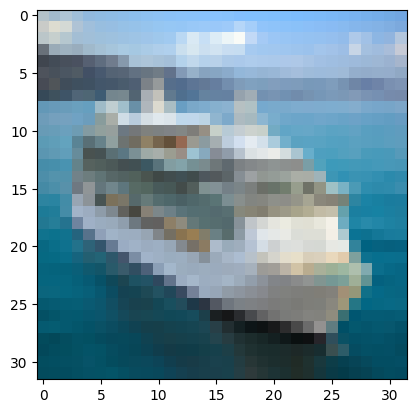

1/1 [==============================] - 0s 27ms/step
Label:  dolphin


In [42]:
from PIL import Image

# Mở ảnh
img = Image.open('Tauthuy.jpg')

# Resize ảnh về kích thước mong muốn
img = img.resize((32, 32))

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = np.asarray(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32') / 255.0

plt.imshow(img.reshape(32,32,3))
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)

class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
temp1 = matrix[0]
print("Label: ", class_names[temp1])
